# Import and Load dataset

In [43]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [44]:
# Load Datset
ecommerce=pd.read_csv('ecommerce_customer_behavior_dataset.csv')

# Dataset Overview 

In [45]:
ecommerce.head(2)

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium


In [46]:
ecommerce.shape

(10000, 16)

<b> Total 10K Data with 16 Columns </b>

In [47]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  10000 non-null  int64  
 1   Age                          10000 non-null  int64  
 2   Gender                       10000 non-null  object 
 3   Location                     10000 non-null  object 
 4   Product Category             10000 non-null  object 
 5   Purchase Amount ($)          10000 non-null  float64
 6   Time Spent on Website (min)  10000 non-null  int64  
 7   Device Type                  10000 non-null  object 
 8   Payment Method               10000 non-null  object 
 9   Discount Availed             10000 non-null  bool   
 10  Number of Items Purchased    10000 non-null  int64  
 11  Return Customer              10000 non-null  bool   
 12  Review Score (1-5)           10000 non-null  int64  
 13  Delivery Time (da

In [48]:
dataset_overview = pd.DataFrame({'Type': ecommerce.dtypes, 'Null': ecommerce.isnull().sum(),'Duplicate': ecommerce.duplicated().sum(), 'Unique': ecommerce.nunique()})


In [49]:
dataset_overview

,Type,Null,Duplicate,Unique
Customer ID,int64,0,0,10000
Age,int64,0,0,52
Gender,object,0,0,3
Location,object,0,0,8
Product Category,object,0,0,8
Purchase Amount ($),float64,0,0,9526
Time Spent on Website (min),int64,0,0,59
Device Type,object,0,0,3
Payment Method,object,0,0,5
Discount Availed,bool,0,0,2


-  No null values
-  No Duplicate values
- Most of the columns are categorical and few are int type

In [50]:
ecommerce.describe(include=['object'])

,Gender,Location,Product Category,Device Type,Payment Method,Subscription Status,Customer Satisfaction
count,10000,10000,10000,10000,10000,10000,10000
unique,3,8,8,3,5,3,3
top,Male,Khulna,Electronics,Mobile,Bank Transfer,Premium,Low
freq,3349,1291,1309,3374,2067,3369,3365


In [51]:
ecommerce.describe(include=['int','float'])

,Customer ID,Age,Purchase Amount ($),Time Spent on Website (min),Number of Items Purchased,Review Score (1-5),Delivery Time (days)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,43.789900,503.892494,29.918400,4.998500,2.995100,7.013000
std,2886.89568,15.005521,286.238084,17.002107,2.574988,1.404163,3.721561
min,1.00000,18.000000,5.190000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,254.937500,15.000000,3.000000,2.000000,4.000000
50%,5000.50000,44.000000,506.195000,30.000000,5.000000,3.000000,7.000000
75%,7500.25000,57.000000,749.135000,45.000000,7.000000,4.000000,10.000000
max,10000.00000,69.000000,999.980000,59.000000,9.000000,5.000000,13.000000


# Level 1 -Basic Insight

<b> Q1: Find Mean, Median, and Mode (Age) </b>

In [52]:
print('Average Customer Age:',ecommerce['Age'].mean())
print('Mode:',ecommerce['Age'].mode()[0])
print('Median:',ecommerce['Age'].median())

Average Customer Age: 43.7899
Mode: 51
Median: 44.0


<b> Observation: </b>

- Average Age is around 44 . Which are categorize into middle age . Its gives the idea that the dataset has old people as well as young people . Also its central age of the data.

- Most Frequnet people are in the site is purchasing product is 51 years old .Interesting, Because of old people are purchasing good amount product from home.We might get more idea on the further exploration in the dataset.Lets see!

- The Median of age 44 years old give the idea about central age of this dataset. 

<b>Q2: Find variance, standard deviation, and z-score (Purchase Amount)</b>

In [53]:
print('Std:',ecommerce['Purchase Amount ($)'].std()) # calculate standard deviation
print('Variance:',ecommerce['Purchase Amount ($)'].var())# calculate variance
z_score=(ecommerce['Purchase Amount ($)']- ecommerce['Purchase Amount ($)'].mean())/ecommerce['Purchase Amount ($)'].std()# Calculate Z-Score
df = pd.DataFrame({
    'Purchase Amount': ecommerce['Purchase Amount ($)'],
    'Z-Score': z_score
}) # Create a DataFrame for better understanding
print('\n')
print(df.head(5).reset_index(drop=True))


Std: 286.23808399685913
Variance: 81932.24073019298


   Purchase Amount   Z-Score
0           202.54 -1.052804
1           655.94  0.531192
2           963.65  1.606207
3           485.59 -0.063942
4           143.27 -1.259869


<b></b>

<b></b>

<b>Q3: What are the top three product categories based on the number of purchases?</b>

In [54]:
ecommerce_sorted = ecommerce.sort_values(by='Number of Items Purchased', ascending=False)
top_categories = ecommerce_sorted.groupby('Product Category').size().nlargest(3)
print(top_categories)

Product Category
Electronics    1309
Clothing       1297
Toys           1288
dtype: int64


<b></b>

<b>Observation:<b>

- The top 3 products are electronics, clothing, and toys. This suggests that people may find it more convenient to purchase these products online without any hassle. Additionally, I assume that significant discounts offered online could be attracting more customers.

<b>Q4: How many customers are classified as return customers?</b>

In [55]:
return_customer = ecommerce['Return Customer'].value_counts()
print('Return Customer:', return_customer.iloc[1])


Return Customer: 4996


<b>Observation: </b>

- Total customer in the datset 10k . Around 49.96% customer return for online purchasing. Around 51% not returned .We have to get more idea to construct why they don't return

<b></b>

<b>Q5: What is the average review score given by customers?</b>

<b></b>

In [56]:
print('Average Review Score:',ecommerce['Review Score (1-5)'].mean())

Average Review Score: 2.9951


<b>Observation: </b>

- So average review score is 3 . Its a mixed or neutral response from customer. We need to improve this if we want to increase profitability.

<b></b>

<b>Q6: How does the average delivery time vary between subscription statuses (Free,
Premium)?</b>

In [57]:
ecommerce.groupby('Subscription Status')['Delivery Time (days)'].mean()

Subscription Status
Free       6.963924
Premium    7.070347
Trial      7.004272
Name: Delivery Time (days), dtype: float64

<b></b>

<b>Observation: </b>

- Those who have Free status are delivered fast compare to other status. For the premium and trial takes extra it might be  because of the the numbers of product or maintain quality of the product during delivery. 

<b>Q7: How many customers are subscribed to the service?</b>

In [58]:
print("Total Subscibe Customer for the service:",ecommerce['Subscription Status'].value_counts().iloc[0])

Total Subscibe Customer for the service: 3369


<b>Observation: </b>

- We are considering only premium customers as paid customers. In some cases, trials are also free online. Therefore, we are counting only premium users as paid services, with a total of 3,369 customers on the site.

<b> Q8: What percentage of customers used devices to make purchases? (Mobile, Desktop,
Tablet)

In [88]:
ecommerce['Device Type'].value_counts(normalize=True)*100

Device Type
Mobile     33.74
Desktop    33.48
Tablet     32.78
Name: proportion, dtype: float64

<b>Observation: </b>

- Mobile devices are easy and convenient to use, which is why most people prefer shopping on mobile. They allow customers to place orders from anywhere using their mobile devices.

<b> Q9: What is the average purchase amount for customers who availed discounts compared
to those who didn’t?

In [60]:
average_purchase_discount = ecommerce[ecommerce['Discount Availed'] == True]['Purchase Amount ($)'].mean()
average_purchase_no_discount = ecommerce[ecommerce['Discount Availed'] == False]['Purchase Amount ($)'].mean()

print("Average Purchase Amount (With Discount):", average_purchase_discount)
print("Average Purchase Amount (Without Discount):", average_purchase_no_discount)

ratio = average_purchase_discount/average_purchase_no_discount

print("Ratio of Average Purchase Amount (With Discount) to Average Purchase Amount (Without Discount):", ratio)


Average Purchase Amount (With Discount): 505.2641777954953
Average Purchase Amount (Without Discount): 502.5114509331728
Ratio of Average Purchase Amount (With Discount) to Average Purchase Amount (Without Discount): 1.005477938576744


<b>Observation: </b>

- Only a 1% difference between the average purchase amount with a discount and without a discount. Its a less significant difference. It indicates only a minor impact and suggests that the discount or without discount does not drastically change customer purchasing behavior in this case

<b>Q10: What is the most common payment method used by customers?

In [61]:
most_common_payment_method = ecommerce['Payment Method'].value_counts().idxmax()
most_common_payment_count = ecommerce['Payment Method'].value_counts().max()

print(f'Most Common Payment Method: {most_common_payment_method},Total:{most_common_payment_count}')


Most Common Payment Method: Bank Transfer,Total:2067


<b>Observation:</b>

- Customers are choosing Bank Transfer for online shopping, which may be due to several reasons:
 1. Security.
 2. Familiarity with the payment method.
 3. Mostly middle-aged and old aged people prefer bank transfers.
 4. Easy and smooth process.

# Level 2: Intermediate Insights 

<b> Q1: What are the average review scores of users of the most common payment method?

In [62]:
most_common_payment_method=ecommerce['Payment Method'].value_counts().idxmax()

avg_review_score=ecommerce[ecommerce['Payment Method']==most_common_payment_method]['Review Score (1-5)'].mean()
print(f'Average Review Score for the most common payment method: {avg_review_score}')

Average Review Score for the most common payment method: 2.9888727624576683


<b> Observation: </b>
- The most common payment method found is bank payment. Bank payment users have given an average review score of around 3, indicating a neutral and mixed response.

<b> Q2: What is the correlation between time spent on the website and purchase amount? Do customers who spend more time on the website purchase more items?

Correlation Between Time Spent on Website (min) and Purchase Amount ($):
                             Time Spent on Website (min)  Purchase Amount ($)
Time Spent on Website (min)                     1.000000             0.010025
Purchase Amount ($)                             0.010025             1.000000


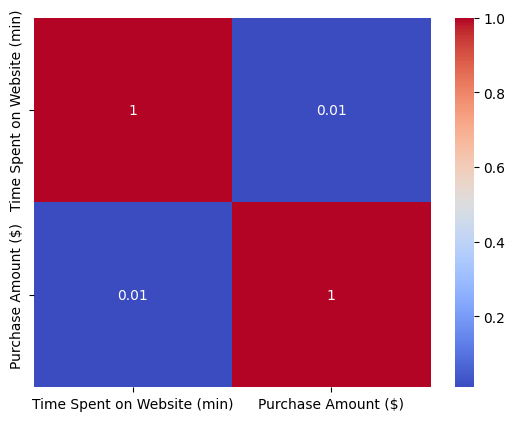

In [84]:
# 'Time Spent on Website (min)','Purchase Amount ($)'
corr_cols=['Time Spent on Website (min)','Purchase Amount ($)']
correlation=ecommerce[corr_cols].corr()
print('Correlation Between Time Spent on Website (min) and Purchase Amount ($):')
print(correlation)
# Visualize the correlation for better understanding
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

<b> Observation </b>
- The correlation between time spent on the website and purchase amount is 0.010025(only 1 %), which is a very low positive correlation. This suggests that there is almost no significant relationship between the amount of time a customer spends on the website and the amount they purchase. 

Correlation Between Time Spent on Website (min) and Number of Items Purchased:
                             Time Spent on Website (min)  \
Time Spent on Website (min)                     1.000000   
Number of Items Purchased                       0.000148   

                             Number of Items Purchased  
Time Spent on Website (min)                   0.000148  
Number of Items Purchased                     1.000000  


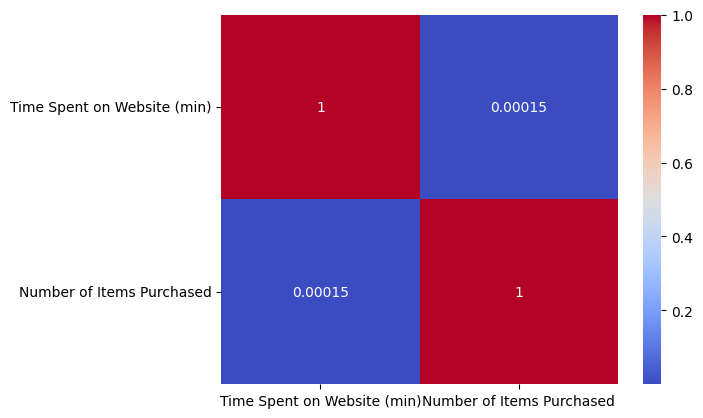

In [85]:
#  'Time Spent on Website (min)' vs 'Number of Items Purchased'
corr_cols=['Time Spent on Website (min)','Number of Items Purchased']
correlation=ecommerce[corr_cols].corr()
print('Correlation Between Time Spent on Website (min) and Number of Items Purchased:')
print(correlation)
# Visualize the correlation for better understanding
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

<b> Observation:  
- The correlation between Time Spent on Website and Number of Items Purchased is 0.000148, which indicates an extremely weak positive correlation, almost negligible. This suggests that there is practically no relationship between the time customers spend on the website and the number of items they purchase.

<b>Q3: What percentage of customers are satisfied (rating of 4 or 5) and are also return
customers?

In [65]:
total_customer=len(ecommerce)
return_customer=ecommerce[((ecommerce['Review Score (1-5)'] == 4) | (ecommerce['Review Score (1-5)'] == 5)) & (ecommerce['Return Customer']==True)]
return_customer=len(return_customer)
percentage_satisfied_return_customers = (return_customer / total_customer)*100
print(f'Percentage of satisfied and return customers : {percentage_satisfied_return_customers} %')


Percentage of satisfied and return customers : 20.080000000000002 %


<b> Observation: </b>

- Only arppox 20% people are satisfied (rating 4 or 5) and also also return customer.  

<b> Q4: What is the relationship between the number of items purchased and customer
satisfaction?

                           satisfaction_mapping  Number of Items Purchased
satisfaction_mapping                   1.000000                  -0.006425
Number of Items Purchased             -0.006425                   1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_11772\689869540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_cols['satisfaction_mapping']=corr_cols['Customer Satisfaction'].map({'Low':0,'Medium':1,'High':2})# mapping for string value to numerical value


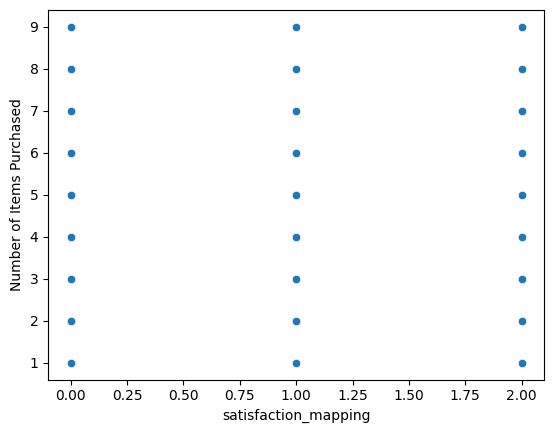

In [66]:
corr_cols=ecommerce[['Customer Satisfaction','Number of Items Purchased']]
corr_cols['satisfaction_mapping']=corr_cols['Customer Satisfaction'].map({'Low':0,'Medium':1,'High':2})# mapping for string value to numerical value
correlation=corr_cols[['satisfaction_mapping','Number of Items Purchased']].corr()
print(correlation)
# Visualize the correlation for better understanding
sns.scatterplot(x='satisfaction_mapping',y='Number of Items Purchased',data=corr_cols)
plt.show()

<b> Observation: 
- The correlation between items purchased and customer satisfaction is -0.0064, indicating a very weak negative correlation. This means that there is almost no linear relationship between the number of items purchased and customer satisfaction.

<b> Q5: Which location has the 2nd highest average purchase amount?

In [67]:
# For Better Understanding
ecommerce.groupby('Location')['Purchase Amount ($)'].mean().sort_values(ascending=False)


Location
Khulna        513.937072
Barisal       513.674560
Mymensingh    507.892211
Chittagong    507.851675
Dhaka         502.002504
Rajshahi      495.544649
Sylhet        494.976427
Rangpur       494.368867
Name: Purchase Amount ($), dtype: float64

In [68]:
second_highes_avg_location=ecommerce.groupby('Location')['Purchase Amount ($)'].mean().sort_values(ascending=False).index[1]
second_highest_loc_avg=ecommerce.groupby('Location')['Purchase Amount ($)'].mean().sort_values(ascending=False).iloc[1]
print(f'Second highest average purchase amount location: {second_highes_avg_location}, Average Purchase Amount: {second_highest_loc_avg}')


Second highest average purchase amount location: Barisal, Average Purchase Amount: 513.6745599999999


<b> observation: </b>
- The location with the second highest average purchase amount is Barisal, with an average purchase amount of 513.67.This indicates that Barisal just below the Khulna which is highest. 

# Level 3: Critical Thinking Insights

<b>Q1: What factors contribute most to a customer being classified as a return customer?

<b> First We need to convert categorical values to numerical values for relation with return customer. </b>

Top Factors Affecting Return Customer Status:                             Return Customer
Discount Availed                   0.025003
Gender_Other                       0.021172
Location_Rajshahi                  0.019608
Delivery Time (days)               0.013922
Payment Method_Credit Card         0.012839
Product Category_Toys              0.011652
Location_Rangpur                   0.010875
Product Category_Clothing          0.010726
Subscription Status_Trial          0.009294


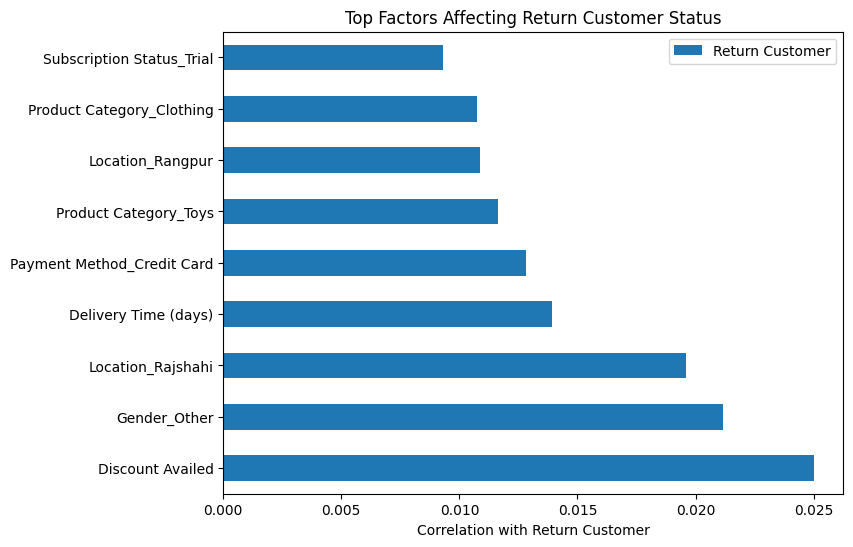

In [69]:
encoded_ecomerce = pd.get_dummies(ecommerce, drop_first=True)# Convert it to one hot encoding
correlation = encoded_ecomerce.corr()
top_factors = correlation[['Return Customer']].sort_values(by='Return Customer', ascending=False)[1:10]  
print('Top Factors Affecting Return Customer Status:',top_factors)
top_factors.plot(kind='barh', figsize=(8, 6), title='Top Factors Affecting Return Customer Status')
plt.xlabel('Correlation with Return Customer')
plt.show()

In [70]:
top_factors_dataset = top_factors.copy()
top_factors_dataset.to_csv('top_factors_return_customers.csv', index=True) # Just to save the data for power Bi visualization

<b>Observation:</b>

**Top 10 Factors Affecting Return Customer Status:**

- Discount Availed: Customers who received discounts are slightly more likely to be return customers.

- Gender: Customers identifying as **"Other"** gender show a small positive correlation with being return customers.

- Location: Customers from **Rajshahi** and **Rangpur** are likely to be return customers, with **Rajshahi** showing a stronger likelihood of customer retention. **Rangpur** has a small positive correlation with return rates.

- Delivery Time: Faster delivery times slightly increase the likelihood of customers returning and significantly affect return customer status.

- Payment Method: Customers using **credit cards** have a small positive correlation with being return customers.

- Product Category: Customers purchasing **toys** and **clothing** are slightly more likely to be return customers.

- Subscription Status: Customers on a **trial subscription** show a small positive correlation with return status.


<b>Q2: How do payment methods influence customer satisfaction and return rates?

In [71]:
payment_return_crosstab = pd.crosstab(ecommerce['Payment Method'],[ecommerce['Customer Satisfaction'],ecommerce['Return Customer']],normalize='index')
payment_return_crosstab

Customer Satisfaction      High                 Low              Medium  \
Return Customer           False     True      False     True      False   
Payment Method                                                            
Bank Transfer          0.174649  0.164973  0.155298  0.172714  0.164006   
Cash on Delivery       0.165919  0.146487  0.174888  0.175386  0.169905   
Credit Card            0.166667  0.179980  0.169132  0.174556  0.151874   
Debit Card             0.172466  0.164397  0.166919  0.167927  0.169440   
PayPal                 0.160836  0.154569  0.169713  0.155614  0.170757   

Customer Satisfaction            
Return Customer           True   
Payment Method                   
Bank Transfer          0.168360  
Cash on Delivery       0.167414  
Credit Card            0.157791  
Debit Card             0.158850  
PayPal                 0.188512

<b> Observation: </b>

<p>We only take True values for each category of Satisfaction.</p>

- Highest Satisfaction Return Customer: Credit card users have the highest customer satisfaction and return rates, with 17% of users being highly satisfied when using credit cards for payment.

- Lowest Satisfaction Return Customer: Most payment methods show slightly better return rates, but PayPal stands out with a higher false return rate compared to its true return rate.

- Medium Satisfaction Return Customer: In this category, PayPal has the highest return rate percentage at 18%, followed by bank transfer and credit card.

<b>Q3: How does the location influence both purchase amount and delivery time?

In [72]:
# Average purchase amount by location
average_purchase_by_location = ecommerce.groupby('Location')['Purchase Amount ($)'].mean()
# Average delivery time by location
average_delivery_time_by_location = ecommerce.groupby('Location')['Delivery Time (days)'].mean()

In [73]:
# Merge into a df for better understand the relationship
location_influence = pd.DataFrame({
    'Average Purchase Amount ($)': average_purchase_by_location,
    'Average Delivery Time (days)': average_delivery_time_by_location
})
print("Location Influence on Purchase Amount and Delivery Time:")
print(location_influence.sort_values(by='Average Purchase Amount ($)', ascending=False))


Location Influence on Purchase Amount and Delivery Time:
            Average Purchase Amount ($)  Average Delivery Time (days)
Location                                                             
Khulna                       513.937072                      6.811774
Barisal                      513.674560                      7.072800
Mymensingh                   507.892211                      7.099219
Chittagong                   507.851675                      7.020440
Dhaka                        502.002504                      6.941957
Rajshahi                     495.544649                      7.113130
Sylhet                       494.976427                      7.018593
Rangpur                      494.368867                      7.031125


<b> Observation: </b>

- Khulna has the highest average purchase amount at $513.94, closely followed by Barisal at $513.67. Additionally, Khulna has the shortest delivery time, which may be a contributing factor to higher purchases in this area.

- Rangpur and Sylhet have the lowest average purchase amounts, around $494, indicating they are lower purchasing areas. Moreover, it takes approximately 7 days for deliveries in these regions, which might be a contributing factor to the lower purchases.



<b> Q4: What major insights are found? Give a proper explanation

<p> Presentation [Video] </p>

# More Insight [Personal Observation]

In [74]:
# create extra column revenue
ecommerce['revenue']=ecommerce['Number of Items Purchased']*ecommerce['Purchase Amount ($)']

## Insight-1

In [75]:
ecommerce.groupby('Customer Satisfaction')['Delivery Time (days)'].mean().sort_values(ascending=False)

Customer Satisfaction
Low       7.050223
Medium    6.995497
High      6.992736
Name: Delivery Time (days), dtype: float64

## Insight-2




In [76]:
ecommerce.groupby('Discount Availed')['revenue'].sum().sort_values(ascending=False)

Discount Availed
False    12708368.33
True     12536066.33
Name: revenue, dtype: float64

<b> Observation: </b>

- The revenue distribution is approximately 50-50 between customers who availed discounts and those who didn't. This suggests that discounts still play an important role in driving revenue, as they are effective in encouraging customers to make purchases, also it contribution in revenue generation.

## Insight-3

In [77]:
print("Top 5 Product Categories by Revenue:")
ecommerce.groupby('Product Category')['revenue'].sum().sort_values(ascending=False).head(5)

Top 5 Product Categories by Revenue:


Product Category
Books          3394150.81
Toys           3389309.07
Home           3220024.72
Clothing       3210482.75
Electronics    3144954.65
Name: revenue, dtype: float64

In [78]:
print("Bottom 5 Product Categories by Revenue:")
ecommerce.groupby('Product Category')['revenue'].sum().sort_values(ascending=True).head(5)

Bottom 5 Product Categories by Revenue:


Product Category
Sports         2878166.05
Beauty         2957895.48
Groceries      3049451.13
Electronics    3144954.65
Clothing       3210482.75
Name: revenue, dtype: float64

## Insight-4

In [79]:
def categorize_age_group(age):# Function to categorize age group based on age
    if 17 <= age <= 30:
        return "Young Adult"
    elif 31 <= age <= 45:
        return "Middle Age Adult"
    elif age > 45:
        return "Old Adult"
    else:
        return "Unknown"

ecommerce['Age_Group'] = ecommerce['Age'].apply(categorize_age_group)


In [80]:
ecommerce.groupby('Age_Group')['revenue'].sum().sort_values(ascending=False)

Age_Group
Old Adult           11917106.88
Middle Age Adult     7130057.56
Young Adult          6197270.22
Name: revenue, dtype: float64

<b> Observation: </b>

- The Old Adult age group generates the highest revenue. This could be due to several factors:

 1. They are more likely to be return customers.
 2. They tend to purchase larger quantities of products.
 3. They may prefer online shopping due to convenience and their age.

- We should focus on the Young Adult and Middle Age Adult categories to boost revenue. Implementing targeted campaigns or offering discounts could help attract these groups to make more purchases.
